In [6]:
# Importăm biblioteca pandas pentru a manipula datele
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

# Citim fișierul CSV cu datele de antrenament și afișăm primele 5 rânduri
df_train = pd.read_csv('train_data.csv')
df_train.head()

# Citim fișierul CSV cu datele de test și afișăm primele 5 rânduri
df_test = pd.read_csv('test_data.csv')
df_test.head()





# Adăugăm coloane noi în setul de date de test pentru fiecare subtask
df_test['Task1'] = 0.0
df_test['Task2'] = 0.25
df_test['Task3'] = 0.0
df_test['Task4'] = 0.0
df_test['Task5'] = 1000.0


df_test['Task1'] = df_test['Square_Footage'] + df_test['Garage_Size'] + df_test['Lot_Size']
df_test['Task2'] = df_test['Garage_Size']/df_test['Total_Rooms']
df_test['Task3'] = (df_test['Solar_Exposure_Index']-df_test['Vibration_Level'])/df_test['Magnetic_Field_Strength']


df_train['Task1'] = df_train['Square_Footage'] + df_train['Garage_Size'] + df_train['Lot_Size']
df_train['Task2'] = df_train['Garage_Size']/df_train['Total_Rooms']
df_train['Task3'] = (df_train['Solar_Exposure_Index']-df_train['Vibration_Level'])/df_train['Magnetic_Field_Strength']

mean_val = df_train['Square_Footage'].mean()

for idx, rows in df_test.iterrows():
    df_test.loc[idx, 'Task4'] = abs(df_test.loc[idx, 'Square_Footage']-mean_val)


targetColumn = 'Price'
df_tes_test = df_test.corr(method='pearson')
df_tes_train = df_train.corr(method='pearson')


filtered_df_tes_train = df_tes_train[(df_tes_train[targetColumn]>=0.05) | (df_tes_train[targetColumn]<-0.05)]
important_col = filtered_df_tes_train.index.values



df_train2 = df_train.loc[:, df_train.columns.isin(important_col)].drop(columns=[targetColumn])
df_test2 = df_test.loc[:, df_test.columns.isin(important_col)]

df_train_target = df_train.loc[:, df_train.columns.isin([targetColumn])]
important_col = df_train2.columns

Index(['ID', 'Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality',
       'Footage_to_Lot_Ratio', 'Total_Rooms', 'Age_of_House',
       'Garage_to_Footage_Ratio', 'Avg_Room_Size', 'House_Orientation_Angle',
       'Street_Alignment_Offset', 'Solar_Exposure_Index',
       'Magnetic_Field_Strength', 'Vibration_Level', 'Task1', 'Task2', 'Task3',
       'Task4', 'Task5'],
      dtype='object')
Index(['ID', 'Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality',
       'Footage_to_Lot_Ratio', 'Total_Rooms', 'Age_of_House',
       'Garage_to_Footage_Ratio', 'Avg_Room_Size', 'Price',
       'House_Orientation_Angle', 'Street_Alignment_Offset',
       'Solar_Exposure_Index', 'Magnetic_Field_Strength', 'Vibration_Level'],
      dtype='object')
Index(['ID', 'Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighb

Index(['Square_Footage', 'Num_Bathrooms', 'Year_Built', 'Lot_Size',
       'Footage_to_Lot_Ratio', 'Total_Rooms', 'Age_of_House',
       'Garage_to_Footage_Ratio', 'Avg_Room_Size', 'Vibration_Level'],
      dtype='object')


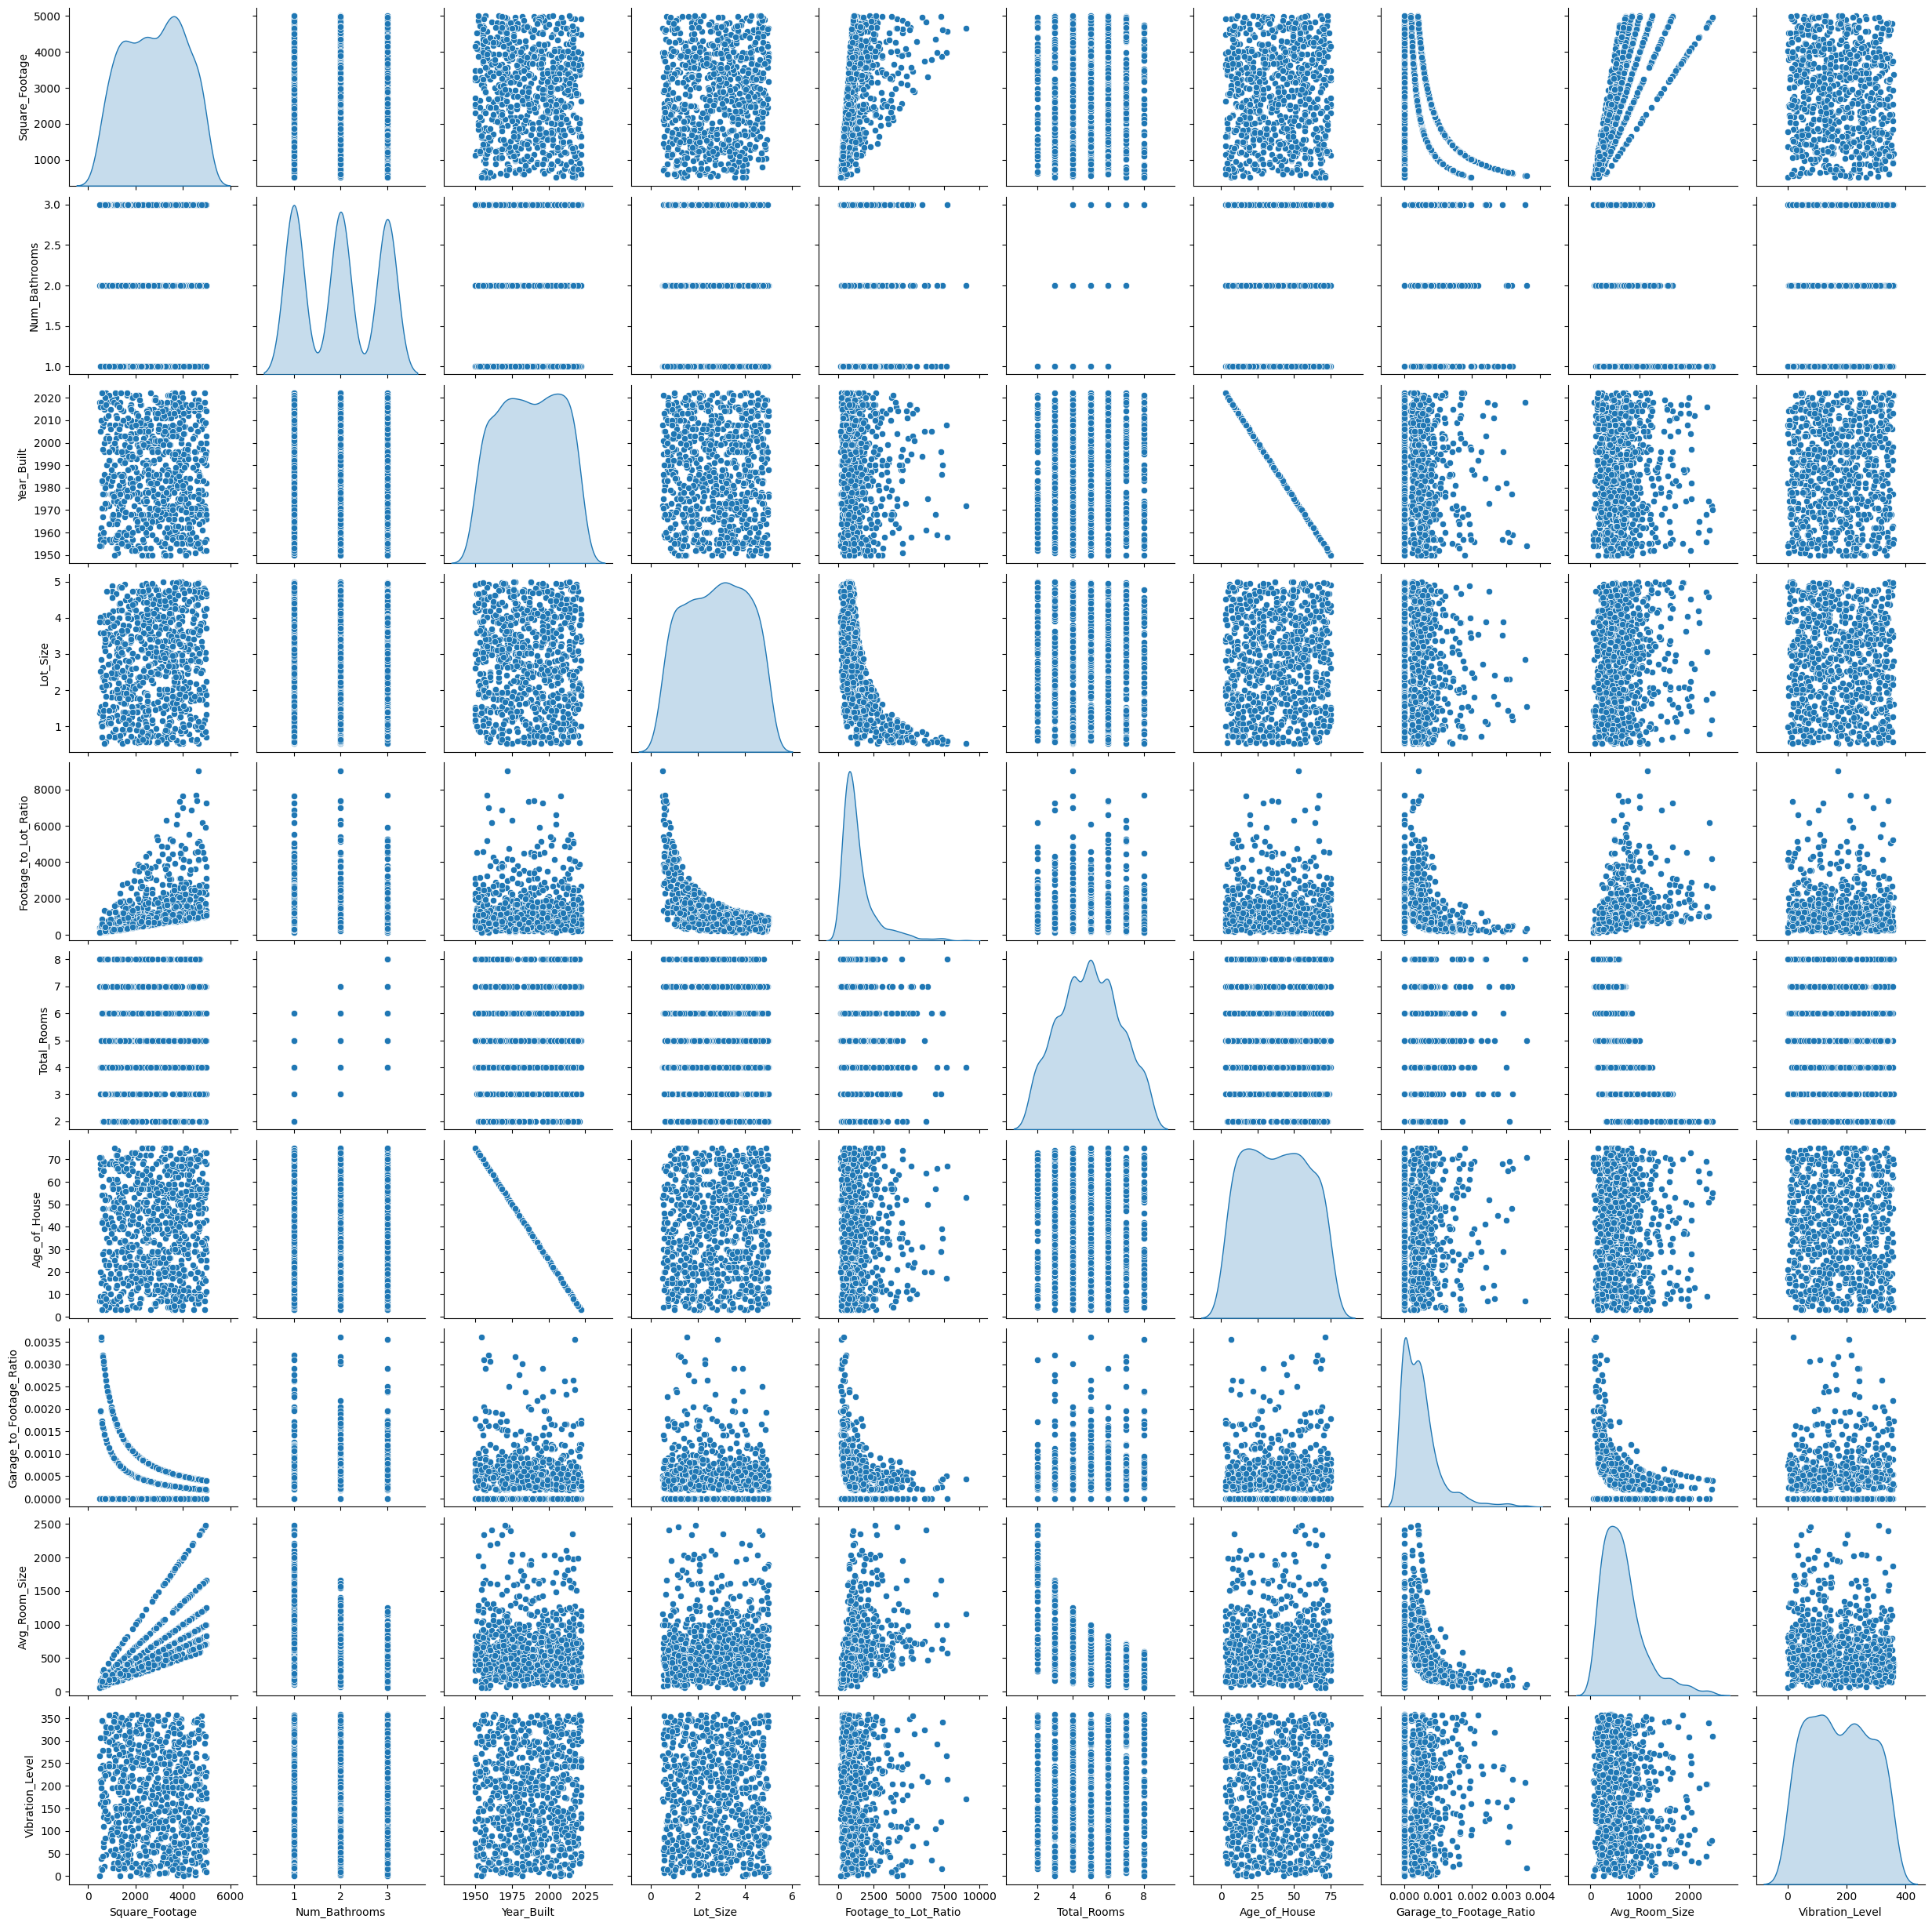

In [2]:
sns.pairplot(data=df_train2, diag_kind='kde')